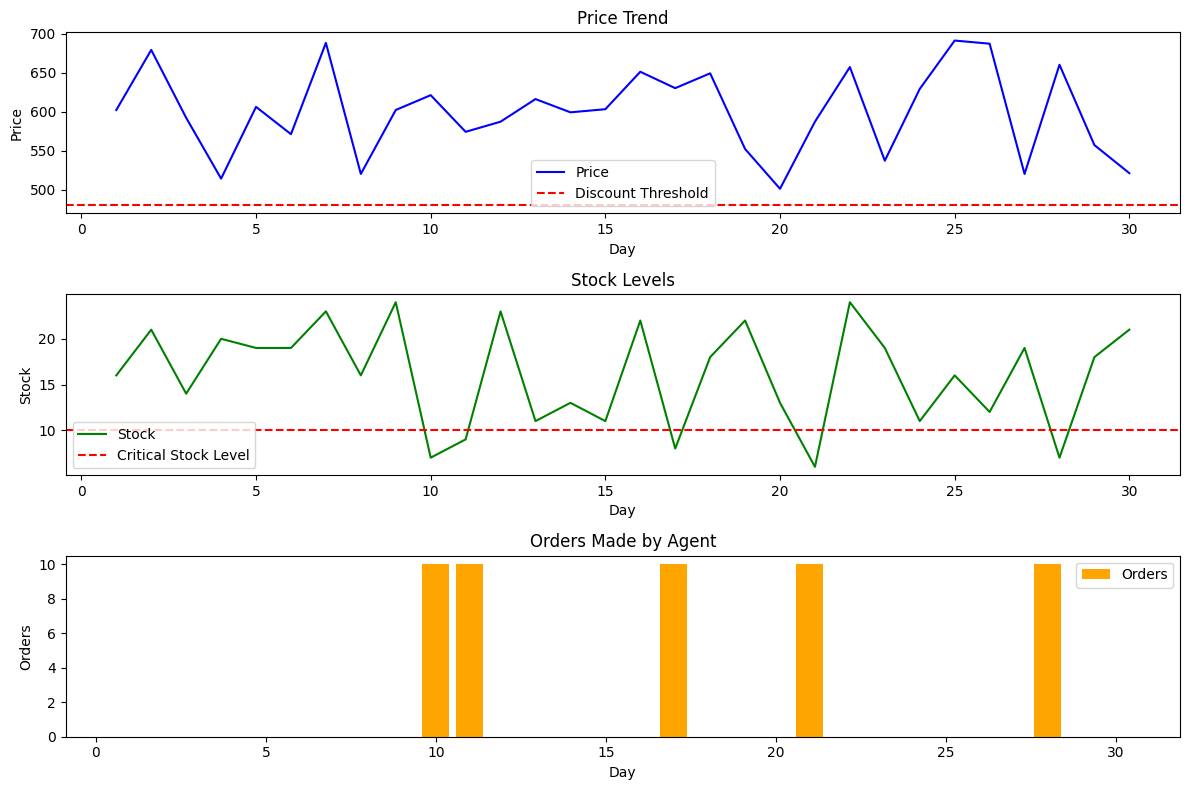

Simulation complete. Graph and data have been saved.


In [2]:
# File: smartphone_inventory_agent.py

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Constants
AVERAGE_PRICE = 600  # Average price of smartphone
STOCK_CRITICAL = 10  # Critical stock level threshold
DISCOUNT_THRESHOLD = 0.8  # 20% discount threshold

# Simulation Data
np.random.seed(42)  # For reproducibility
days = 30
prices = np.random.randint(500, 700, size=days)  # Random prices between 500 and 700
stock_levels = np.random.randint(5, 25, size=days)  # Random stock levels between 5 and 25

# Decision Agent
orders = []
for day in range(days):
    price = prices[day]
    stock = stock_levels[day]

    if price < AVERAGE_PRICE * DISCOUNT_THRESHOLD:  # Price below 20% discount
        if stock >= STOCK_CRITICAL:
            orders.append(15)  # Order a specific quantity
        else:
            orders.append(10)  # Order minimum quantity to restock
    elif stock < STOCK_CRITICAL:  # Stock is critical
        orders.append(10)  # Order minimum quantity
    else:
        orders.append(0)  # No order

# Create DataFrame for analysis
data = pd.DataFrame({
    'Day': np.arange(1, days + 1),
    'Price': prices,
    'Stock': stock_levels,
    'Orders': orders
})

# Plot Results
plt.figure(figsize=(12, 8))

# Plot Prices
plt.subplot(3, 1, 1)
plt.plot(data['Day'], data['Price'], label='Price', color='blue')
plt.axhline(AVERAGE_PRICE * DISCOUNT_THRESHOLD, color='red', linestyle='--', label='Discount Threshold')
plt.title('Price Trend')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()

# Plot Stock Levels
plt.subplot(3, 1, 2)
plt.plot(data['Day'], data['Stock'], label='Stock', color='green')
plt.axhline(STOCK_CRITICAL, color='red', linestyle='--', label='Critical Stock Level')
plt.title('Stock Levels')
plt.xlabel('Day')
plt.ylabel('Stock')
plt.legend()

# Plot Orders
plt.subplot(3, 1, 3)
plt.bar(data['Day'], data['Orders'], label='Orders', color='orange')
plt.title('Orders Made by Agent')
plt.xlabel('Day')
plt.ylabel('Orders')
plt.legend()

plt.tight_layout()
plt.savefig('trading_agent_graph.png')  # Save the graph for submission
plt.show()

# Save data to CSV for further analysis or verification
data.to_csv('trading_agent_data.csv', index=False)
print("Simulation complete. Graph and data have been saved.")
